# Auto encoders  on handwritten digit dataset


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

### Importing the dataset

In [8]:
(X_train,_),(X_test,_) = mnist.load_data()


#### Normalizing the values

In [19]:
np.max(X_train) #normalize this with 255

255

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [20]:
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

### Reshaping 2d images to 1d for network procesing

In [24]:
X_train = X_train.reshape(len(X_train),28*28)
X_test = X_test.reshape(len(X_test),28*28) 

In [25]:
X_train.shape

(60000, 784)

### Visualizing the data

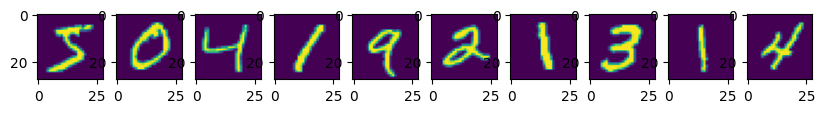

In [29]:
plt.figure(figsize=(10,5))
for i in range(10):
    ax =plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28))


In [38]:
def show_visual(data,title,n=10,height =28,width =28):
    plt.figure(figsize=(10,5))
    for i in range(n):
         ax =plt.subplot(1,n,i+1)
         plt.imshow(data[i].reshape(height,width))
         plt.gray()
         plt.suptitle(title,fontsize =20)



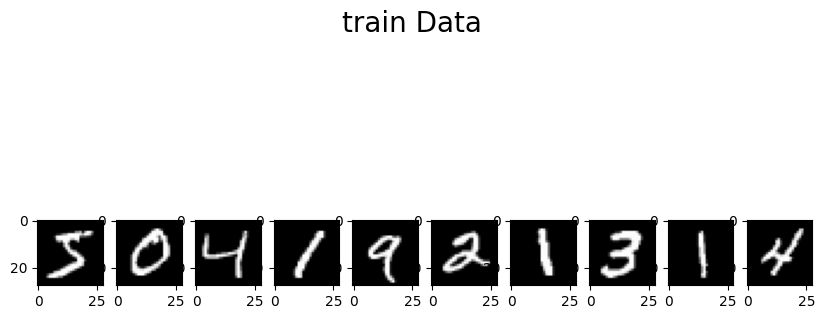

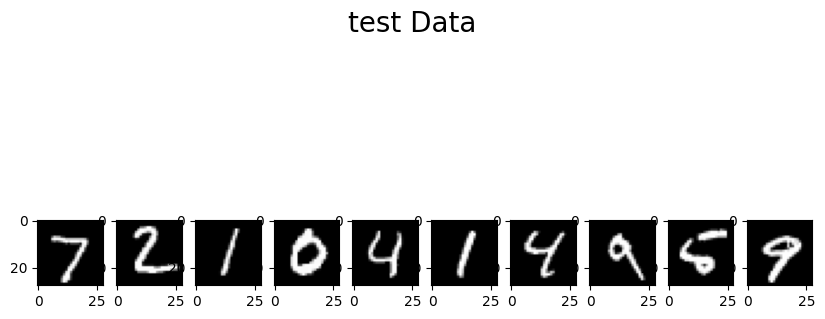

In [39]:
show_visual(X_train,title = 'train Data',)
show_visual(X_test,title = 'test Data',)

### Layer setting

In [58]:
input_dim = 784
output_dim = 784
encode_dim =100
hidden_dim =256

In [70]:
### Input layer

input_layer = Input(shape=(input_dim,),name ="INPUT")
### Encoder layer
hidden_layer_1= Dense(hidden_dim,activation = 'relu',name ="HIDDEN_LAYER_1")(input_layer)


In [72]:
### Bottle neck
##takes values from hiddne layer
bottle_neck = Dense(encode_dim,activation = 'relu',name ="BOTTLE_NECK")(hidden_layer_1)

In [78]:
### Decoder

hidden_layer2 = Dense(hidden_dim,activation = 'relu', name = "Hidden_2")(bottle_neck)
### output layer
output_layer = Dense(output_dim,activation = 'sigmoid',name ="OUTPUT")(hidden_layer2) #sigmoid functions pushes the out put btw 0 & 1
#below 0.5 its not confident,above means sure

### MODEL SELECTION

In [79]:
model = Model(input_layer,output_layer)


In [80]:
model.compile(optimizer='adam',loss = 'binary_crossentropy')

In [81]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HIDDEN_LAYER_1 (Dense)          │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BOTTLE_NECK (Dense)             │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Dense)                  │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,004 (1.73 MB)

 Trainable params: 454,004 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.fit(X_train,X_train, epochs = 10) #unsupervise , so no labels

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1601
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0827
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0742
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0729
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0711
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0704
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0701
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0699


In [83]:
decoded_data = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Visualizing the output

In [89]:
get_encoded_data = Model(inputs = model.input, outputs = model.get_layer("BOTTLE_NECK").output)

In [92]:
encoded_data = get_encoded_data(X_test)

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def show_me_nuts(data, title, height=10, width=10, n=10):
    # Convert the TensorFlow tensor to a NumPy array if necessary
    if isinstance(data, tf.Tensor):
        data = data.numpy()  # Convert to NumPy array

    plt.figure(figsize=(width, height))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(data[i].reshape(height, width), cmap='gray')
        plt.axis('off')  # Turn off axis labels
    plt.suptitle(title, fontsize=20)
    plt.show()



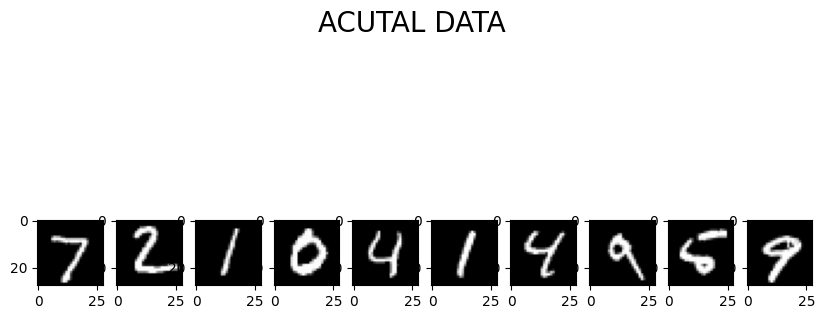

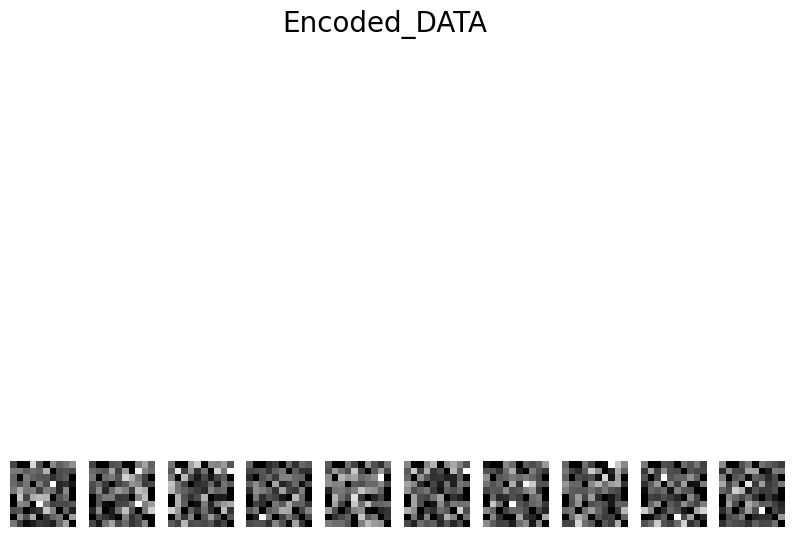

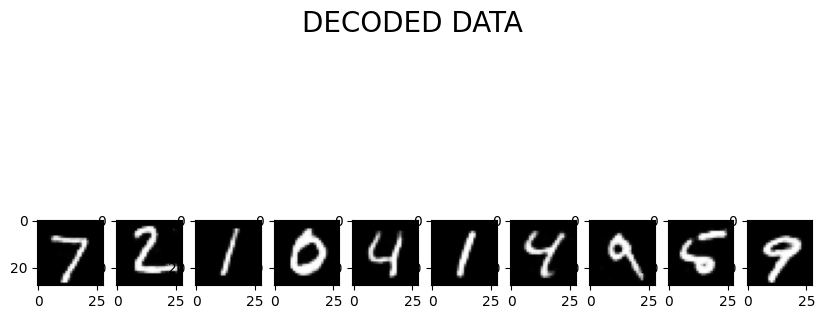

In [95]:
show_visual(X_test,title ='ACUTAL DATA')
show_me_nuts(encoded_data,title ="Encoded_DATA",height =10,width =10)
show_visual(decoded_data,title ="DECODED DATA")